In [2]:
import pandas as pd
import random
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as sts
import statsmodels.stats as stm
import scikit_posthocs as sp
import matplotlib.pyplot as plt

df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
#df=pd.read_csv(os.getcwd() + '\..\..Examples\EFIplus_mdeit.zip', compression='zip',sep=";" ) para ficheiros em pastas diferentes

Ex 5.1

In [3]:
alpha = .05

freqtable = pd.crosstab(df.Country, df['Salmo trutta fario']) 

res = sts.chi2_contingency(freqtable)
# styling
print(f'Test statistic: {res[0]}, pvalue: {res[1]}, df: {res[2]}')
if res[1] < alpha: print('--> Reject H_0. The two variables are NOT independent.')
else: print('Do NOT reject H_0. The frequency of presence of salmo trutta fario is independent of the country.')
print(res)
print(freqtable)

Test statistic: 496.3723854072799, pvalue: 2.9162328651936495e-107, df: 3
--> Reject H_0. The two variables are NOT independent.
(496.3723854072799, 2.9162328651936495e-107, 3, array([[  28.39193774,   43.60806226],
       [  72.95150669,  112.04849331],
       [ 341.88625025,  525.11374975],
       [1532.77030533, 2354.22969467]]))
Salmo trutta fario     0     1
Country                       
France                13    59
Italy                109    76
Portugal             615   252
Spain               1239  2648


Ex 5.2

In [4]:
df2=df.dropna()
data = df2[['Salmo trutta fario', 'Actual_river_slope']]
sample0 = df2[df2['Salmo trutta fario']==0]['Actual_river_slope']
sample1 = df2[df2['Salmo trutta fario']==1]['Actual_river_slope']

stats, p = sts.mannwhitneyu(sample0,sample1,alternative='two-sided')
print('t-stat=%.3f, p-value=%.3f' % (stats,p))

if p < alpha: print('--> Reject H_0. The median of the statistical populations (actual_river_slope in presence vs. actual_river_slope non-presence) are NOT equal(0=not present)')
else: print('Do NOT reject H_0. The frequency of presence of salmo trutta fario is independent of the river_slope.')

t-stat=439968.000, p-value=0.000
--> Reject H_0. The median of the statistical populations (actual_river_slope in presence vs. actual_river_slope non-presence) are NOT equal(0=not present)


5.3

In [5]:
catchment_count = pd.crosstab(index = df['Catchment_name'], columns='count')
catchment_count.sort_values(by=['count'], ascending=False)

col_0,count
Catchment_name,
Ebro,736
Galiza-Norte,709
Minho,707
Tejo,509
Cantabrica,502
Douro,401
Guadia,313
Catala,242
Tevere,106


<AxesSubplot: xlabel='Actual_river_slope', ylabel='Count'>

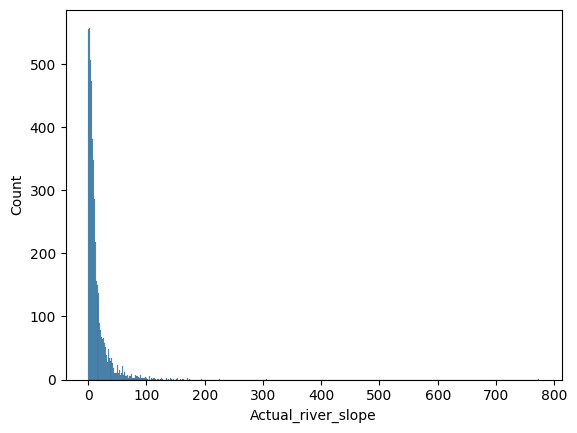

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

dfsub = df2[(df2['Catchment_name']=='Ebro') | 
    (df2['Catchment_name']=='Galiza-Norte') |
    (df2['Catchment_name']=='Minho') |
    (df2['Catchment_name']=='Tejo')
    ]

sns.histplot(df['Actual_river_slope'])

In [9]:
# Multiple comparisons - perform Tukey's test 
tukey = stm.multicomp.pairwise_tukeyhsd(endog=dfsub['Elevation_mean_catch'],
                          groups=dfsub['Catchment_name'],
                          alpha=0.05)
#results
print(tukey)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1       group2     meandiff p-adj    lower     upper   reject
---------------------------------------------------------------------
        Ebro Galiza-Norte -518.8618    0.0  -624.422 -413.3017   True
        Ebro        Minho  -41.8011 0.7388 -147.3794   63.7771  False
        Ebro         Tejo -501.9569    0.0 -615.5935 -388.3203   True
Galiza-Norte        Minho  477.0607    0.0  434.8052  519.3162   True
Galiza-Norte         Tejo   16.9049 0.8853   -42.694   76.5038  False
       Minho         Tejo -460.1558    0.0 -519.7868 -400.5248   True
---------------------------------------------------------------------


Ex 5.4

In [10]:
print(dfsub['Catchment_name'].value_counts())
print(df['Salmo trutta fario'].value_counts())

Galiza-Norte    702
Minho           699
Tejo            235
Ebro             61
Name: Catchment_name, dtype: int64
1    3035
0    1976
Name: Salmo trutta fario, dtype: int64
